            Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC  \
0     Naive Bayes  0.751566   0.782375  0.751566  0.746476  0.914815   
1   Decision Tree  0.918580   0.920186  0.918580  0.918994  0.966318   
2   Random Forest  0.920668   0.922671  0.920668  0.921113  0.992898   
3  MLP Classifier  0.864301   0.868110  0.864301  0.862284  0.482831   

   Fidelity  R2_Score  Mean Absolute Error  
0  0.751566  0.633571             0.321503  
1  0.918580  0.736887             0.160752  
2  0.920668  0.705204             0.167015  
3  0.864301  0.721734             0.208768  


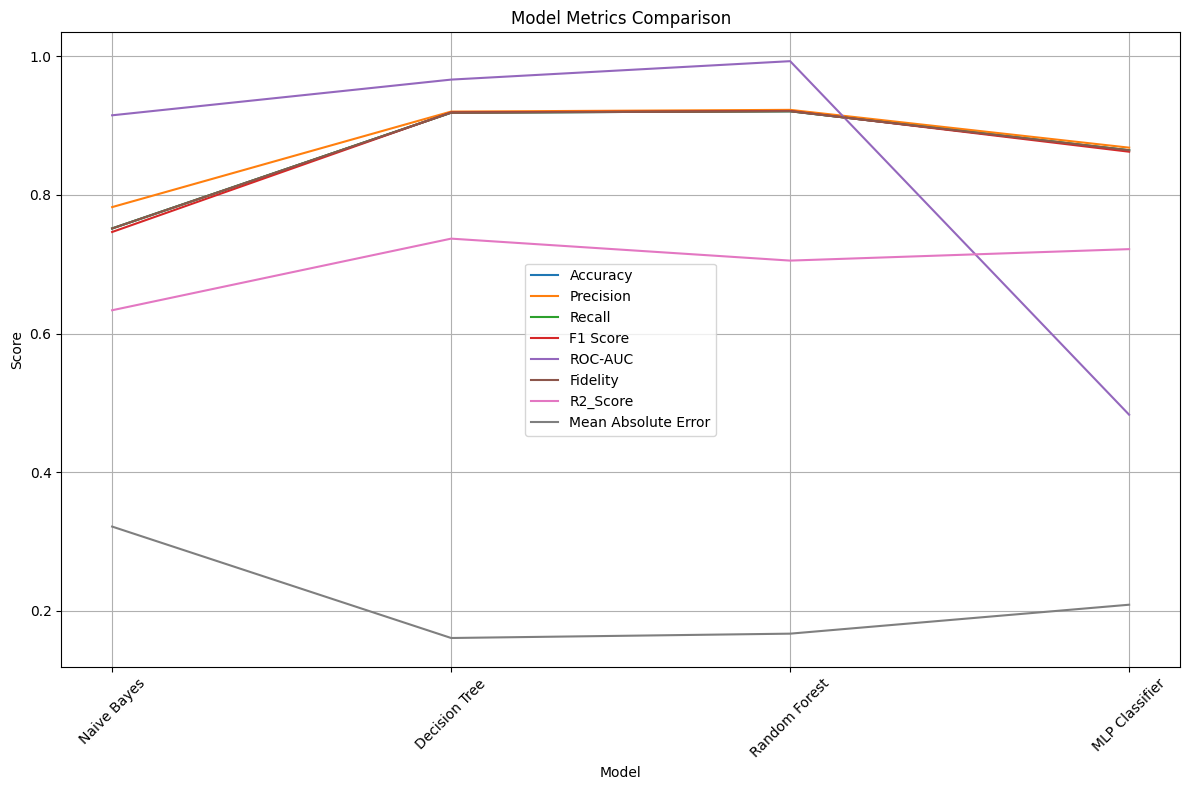

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load metrics from individual files
dt_metrics = pd.read_csv(r"C:\Users\aryan\Desktop\XAI\XAI_Models\multiclass\student_performance\Decision Tree\decision_tree_metrics.csv")
mlp_metrics = pd.read_csv(r"C:\Users\aryan\Desktop\XAI\XAI_Models\multiclass\student_performance\MLP Classifier\mlp_classifier_metrics.csv")
rf_metrics = pd.read_csv(r"C:\Users\aryan\Desktop\XAI\XAI_Models\multiclass\student_performance\Random Forest\random_forest_metrics.csv")
nb_metrics = pd.read_csv(r"C:\Users\aryan\Desktop\XAI\XAI_Models\multiclass\student_performance\Naive Bayes\naive_bayes_metrics.csv")

# Combine all metrics into a single DataFrame
combined_metrics = pd.concat([nb_metrics, dt_metrics, rf_metrics, mlp_metrics], ignore_index=True)

# Display combined metrics
print(combined_metrics)

# Save combined metrics as CSV (optional)
combined_metrics.to_csv("combined_metrics_student_performance.csv", index=False)

# Plot comparison
plt.figure(figsize=(12, 8))
metrics_to_plot = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC", "Fidelity", "R2_Score", "Mean Absolute Error"]
for metric in metrics_to_plot:
    plt.plot(combined_metrics["Model"], combined_metrics[metric], label=metric)

plt.title("Model Metrics Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


            Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC  \
0     Naive Bayes  0.511628   0.476744  0.511628  0.450592  0.752381   
1   Decision Tree  0.720930   0.722148  0.720930  0.710265  0.848810   
2   Random Forest  0.790698   0.799344  0.790698  0.788704  0.919048   
3  MLP Classifier  0.744186   0.744574  0.744186  0.740316  0.830952   

   Fidelity  R2_Score  Mean Absolute Error  
0  0.511628  0.431752             0.813953  
1  0.720930  0.634142             0.488372  
2  0.790698  0.797610             0.325581  
3  0.744186  0.641926             0.465116  


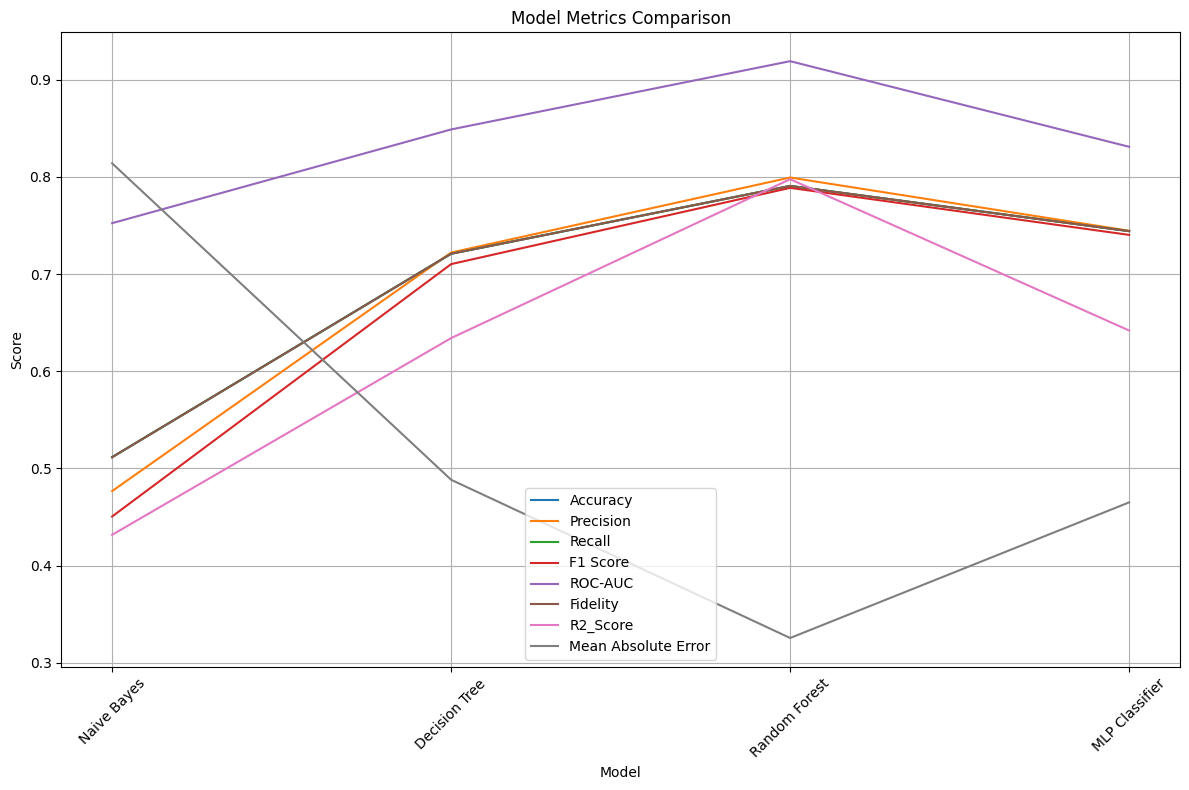

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load metrics from individual files
dt_metrics = pd.read_csv(r"C:\Users\aryan\Desktop\XAI\XAI_Models\multiclass\glass\Decision Tree\decision_tree_metrics.csv")
mlp_metrics = pd.read_csv(r"C:\Users\aryan\Desktop\XAI\XAI_Models\multiclass\glass\MLP Classifier\mlp_classifier_metrics.csv")
rf_metrics = pd.read_csv(r"C:\Users\aryan\Desktop\XAI\XAI_Models\multiclass\glass\Random Forest\random_forest_metrics.csv")
nb_metrics = pd.read_csv(r"C:\Users\aryan\Desktop\XAI\XAI_Models\multiclass\glass\Naive Bayes\naive_bayes_metrics.csv")

# Combine all metrics into a single DataFrame
combined_metrics = pd.concat([nb_metrics, dt_metrics, rf_metrics, mlp_metrics], ignore_index=True)

# Display combined metrics
print(combined_metrics)

# Save combined metrics as CSV (optional)
combined_metrics.to_csv("combined_metrics_glass.csv", index=False)

# Plot comparison
plt.figure(figsize=(12, 8))
metrics_to_plot = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC", "Fidelity", "R2_Score", "Mean Absolute Error"]
for metric in metrics_to_plot:
    plt.plot(combined_metrics["Model"], combined_metrics[metric], label=metric)

plt.title("Model Metrics Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [3]:
import pandas as pd

# Load both CSV files
file1 = r"C:\Users\aryan\Desktop\XAI\XAI_Models\multiclass\combined_metrics_glass.csv"  # Replace with your actual file path
file2 = r"C:\Users\aryan\Desktop\XAI\XAI_Models\multiclass\combined_metrics_student_performance.csv"  # Replace with your actual file path

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

# Merge both datasets
merged_df = pd.concat([df1, df2], ignore_index=True)

# Save the merged file
merged_file_path = r"C:\Users\aryan\Desktop\XAI\XAI_Models\multiclass\combined_metrics_all_datasets.csv"
merged_df.to_csv(merged_file_path, index=False)

print("Merged CSV saved at:", merged_file_path)


Merged CSV saved at: C:\Users\aryan\Desktop\XAI\XAI_Models\multiclass\combined_metrics_all_datasets.csv


In [4]:
import pandas as pd
import scipy.stats as stats

# Load the dataset
file_path = r"C:\Users\aryan\Desktop\XAI\XAI_Models\multiclass\combined_metrics_all_datasets.csv"
df = pd.read_csv(file_path)

# List of metrics to analyze
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC", "Fidelity", "R2_Score", "Mean Absolute Error"]

# Perform ANOVA for each metric
anova_results = {}
for metric in metrics:
    # Extract data for each model
    model_groups = [df[df["Model"] == model][metric] for model in df["Model"].unique()]
    
    # Perform ANOVA test
    f_stat, p_value = stats.f_oneway(*model_groups)
    
    # Store results
    anova_results[metric] = {"F-statistic": f_stat, "p-value": p_value}

# Convert results to a DataFrame and display
anova_df = pd.DataFrame(anova_results).T
print(anova_df)


                     F-statistic   p-value
Accuracy                1.246291  0.403833
Precision               1.032735  0.467885
Recall                  1.246291  0.403833
F1 Score                1.290041  0.392266
ROC-AUC                 1.648739  0.313181
Fidelity                1.246291  0.403833
R2_Score                2.067832  0.247180
Mean Absolute Error     0.696481  0.600968
